In [1]:
from src.modules.dataset import FlickrDataset, Collate
from torch.utils.data import DataLoader
from src.modules.model import CNNtoRNN
import torch
from tqdm import tqdm
import plotly.express as px
import plotly.io as pio
import torchvision.transforms as T

pio.renderers.default = 'png'

In [2]:
imgs_path = '/mnt/s/CV/data/Images'
captions_path = '/mnt/s/CV/data/captions.txt'

In [3]:
batch_size = 8
embed_size = 512
hidden_size = 512
num_features = 2048
num_epochs = 20

In [4]:
dataset = FlickrDataset(imgs_path, captions_path)
collate = Collate(pad_idx=dataset.vocab.word2idx['<PAD>'])
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=collate)

In [5]:
vocab_size = len(dataset.vocab)
vocab = dataset.vocab
model = CNNtoRNN(
    embed_size=embed_size,
    num_features=num_features,
    hidden_size=hidden_size,
    vocab_size=vocab_size
).cuda()

In [6]:
img_batch, cap_batch = next(iter(dataloader))
img_batch = img_batch.cuda()
cap_batch = cap_batch.cuda()

In [7]:
# model.forward(img_batch, cap_batch)

In [8]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

inv_normalize = T.Normalize(
   mean = [-m/s for m, s in zip(mean, std)],
   std = [1/s for s in std]
)

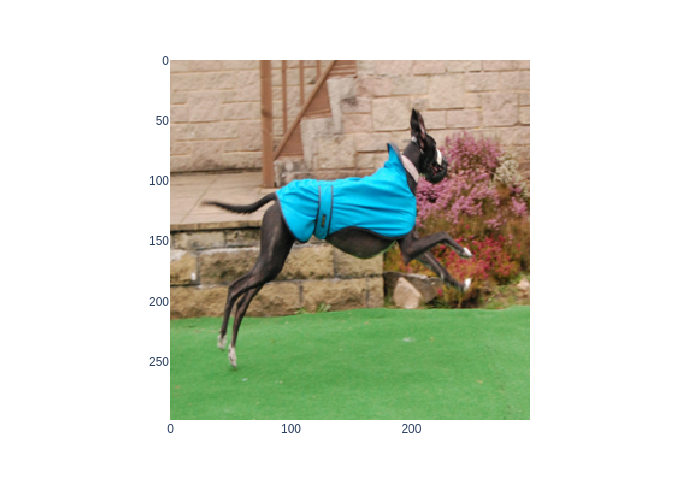

Epoch: 0


  0%|          | 0/5057 [00:00<?, ?it/s]/home/screamer/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning:

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)

  4%|▍         | 201/5057 [00:29<12:54,  6.27it/s]

a man a man is a . <EOS>
Loss: 4.827



  8%|▊         | 401/5057 [00:58<11:45,  6.60it/s]

a man in a dog is a black . <EOS>
Loss: 4.5



 12%|█▏        | 601/5057 [01:27<11:20,  6.55it/s]

a man in a black dog is a <UNK> . <EOS>
Loss: 4.256



 16%|█▌        | 801/5057 [01:55<10:31,  6.74it/s]

a man is a white dog is a <UNK> . <EOS>
Loss: 4.222



 20%|█▉        | 1001/5057 [02:23<10:12,  6.62it/s]

a man in a black and white dog is running on a blue . <EOS>
Loss: 3.935



 24%|██▎       | 1201/5057 [02:53<09:26,  6.80it/s]

a man in a red and a black dog is in the water . <EOS>
Loss: 3.724



 28%|██▊       | 1401/5057 [03:21<08:54,  6.84it/s]

a man is jumping on a large . <EOS>
Loss: 3.256



 32%|███▏      | 1601/5057 [03:50<08:16,  6.97it/s]

a man is jumping on a large . <EOS>
Loss: 3.619



 36%|███▌      | 1801/5057 [04:19<07:45,  7.00it/s]

a boy is jumping in the air . <EOS>
Loss: 3.884



 40%|███▉      | 2001/5057 [04:47<07:29,  6.80it/s]

a man and a white dog is running through a field . <EOS>
Loss: 3.499



 44%|████▎     | 2201/5057 [05:16<07:14,  6.57it/s]

a man in a white dog is jumping on a field . <EOS>
Loss: 4.079



 47%|████▋     | 2401/5057 [05:46<06:36,  6.70it/s]

a man in a red shirt is walking on a white dog . <EOS>
Loss: 3.695



 51%|█████▏    | 2601/5057 [06:14<05:56,  6.90it/s]

a man in a blue shirt is jumping on a blue shirt . <EOS>
Loss: 3.462



 55%|█████▌    | 2801/5057 [06:43<05:32,  6.79it/s]

a man in a black dog is jumping on a beach . <EOS>
Loss: 3.783



 59%|█████▉    | 3001/5057 [07:12<05:18,  6.46it/s]

a girl in a red shirt is jumping over a red . <EOS>
Loss: 3.161



 63%|██████▎   | 3201/5057 [07:41<04:34,  6.77it/s]

a man in a red shirt is jumping on a snowy . <EOS>
Loss: 3.791



 67%|██████▋   | 3401/5057 [08:09<03:56,  7.01it/s]

a person is jumping on a large rock . <EOS>
Loss: 4.162



 71%|███████   | 3601/5057 [08:38<03:34,  6.79it/s]

a boy and a white dog is running through the grass . <EOS>
Loss: 3.827



 75%|███████▌  | 3801/5057 [09:07<03:09,  6.63it/s]

a man is standing on a skateboard . <EOS>
Loss: 3.019



 79%|███████▉  | 4001/5057 [09:35<02:36,  6.74it/s]

a man is jumping a frisbee in the air . <EOS>
Loss: 3.051



 83%|████████▎ | 4201/5057 [10:04<02:01,  7.03it/s]

a boy in a red shirt and a black dog is running through the grass . <EOS>
Loss: 3.475



 87%|████████▋ | 4401/5057 [10:33<01:37,  6.75it/s]

a man is jumping in the air . <EOS>
Loss: 3.106



 91%|█████████ | 4601/5057 [11:01<01:08,  6.64it/s]

a man in a black shirt is jumping over a red and white dog . <EOS>
Loss: 3.405



 95%|█████████▍| 4801/5057 [11:30<00:35,  7.16it/s]

a young boy is running on a large rock . <EOS>
Loss: 2.562



 99%|█████████▉| 5001/5057 [11:58<00:07,  7.41it/s]

a man is playing with a white dog . <EOS>
Loss: 3.036



100%|██████████| 5057/5057 [12:06<00:00,  6.96it/s]


Epoch: 1


  4%|▍         | 201/5057 [00:28<11:58,  6.75it/s]

a man in a black and white dog is running through the grass . <EOS>
Loss: 3.312



  8%|▊         | 401/5057 [00:57<11:06,  6.98it/s]

a man in a red shirt is jumping over a large pool . <EOS>
Loss: 2.887



 12%|█▏        | 601/5057 [01:26<11:25,  6.50it/s]

a man in a black shirt and a red shirt and a white dog is running through the grass .
Loss: 3.5



 16%|█▌        | 801/5057 [01:54<10:27,  6.78it/s]

a man in a red shirt is jumping into the water . <EOS>
Loss: 3.091



 20%|█▉        | 1001/5057 [02:23<09:40,  6.99it/s]

a man in a black shirt and a blue shirt is jumping over a large stick . <EOS>
Loss: 3.369



 24%|██▎       | 1201/5057 [02:51<09:11,  6.99it/s]

a man in a white shirt and a black shirt is jumping over a red and white dog . <EOS>
Loss: 3.207



 28%|██▊       | 1401/5057 [03:20<08:59,  6.78it/s]

a man is wearing a white shirt and a black dog is running on a grassy field . <EOS>
Loss: 3.534



 32%|███▏      | 1601/5057 [03:48<08:14,  6.99it/s]

a man in a yellow shirt and white dog is running in the grass . <EOS>
Loss: 2.759



 36%|███▌      | 1801/5057 [04:17<08:25,  6.44it/s]

a man in a black and white dog is jumping into a yellow ball . <EOS>
Loss: 2.481



 40%|███▉      | 2001/5057 [04:45<08:02,  6.34it/s]

a man in a black shirt is running on a grassy field . <EOS>
Loss: 3.136



 44%|████▎     | 2201/5057 [05:14<07:21,  6.47it/s]

a man is standing on a large <UNK> of a large stick . <EOS>
Loss: 3.157



 47%|████▋     | 2401/5057 [05:42<06:39,  6.65it/s]

a man is standing in front of a large white and white dog . <EOS>
Loss: 3.187



 51%|█████▏    | 2601/5057 [06:11<06:04,  6.75it/s]

a man in a blue shirt and a black dog is jumping on a rock . <EOS>
Loss: 3.019



 55%|█████▌    | 2801/5057 [06:40<05:41,  6.60it/s]

a man in a black and white dog is running through a grassy field . <EOS>
Loss: 3.428



 59%|█████▉    | 3001/5057 [07:09<05:17,  6.47it/s]

a young boy in a blue shirt is jumping in a field . <EOS>
Loss: 3.126



 63%|██████▎   | 3201/5057 [07:38<04:39,  6.65it/s]

a man in a blue shirt and a black and white dog is jumping over a tree . <EOS>
Loss: 3.51



 67%|██████▋   | 3401/5057 [08:07<04:08,  6.66it/s]

a man in a red shirt is jumping over a red toy . <EOS>
Loss: 3.009



 71%|███████   | 3601/5057 [08:35<03:32,  6.86it/s]

a man is jumping over a dog . <EOS>
Loss: 3.258



 72%|███████▏  | 3638/5057 [08:40<03:02,  7.76it/s]

In [9]:
lr = 1e-4
optimizer = torch.optim.Adam(
    params=model.parameters(), 
    lr=lr
)
criterion = torch.nn.CrossEntropyLoss(ignore_index=vocab.word2idx['<PAD>']).cuda()


px.imshow(inv_normalize(img_batch[0].cpu()).permute(1, 2, 0)).show()
for epoch in range(num_epochs):
    print(f'Epoch: {epoch}')
    for i, (imgs, captions) in enumerate(tqdm(dataloader), start=1):
        imgs = imgs.cuda()
        captions: torch.Tensor = captions.cuda()
        captions_input = captions[:, :-1]
        captions_expected = captions[:, 1:]
        optimizer.zero_grad()
        outputs: torch.Tensor = model(
            imgs,
            captions_input
        )
        loss: torch.Tensor = criterion(
            outputs.contiguous().view(-1, vocab_size),
            captions_expected.contiguous().view(-1)
        )
        loss.backward()
        optimizer.step()
        if i % 200 == 0:
            preds = model.caption_image(img_batch[0])
            preds = [vocab.idx2word[idx] for idx in preds]
            print(' '.join(preds))
            print('Loss:', round(loss.item(), 3))
            print()
torch.save(model.state_dict(), 'weights.pt')

In [ ]:
model.load_state_dict(torch.load('weights.pt'))

<All keys matched successfully>

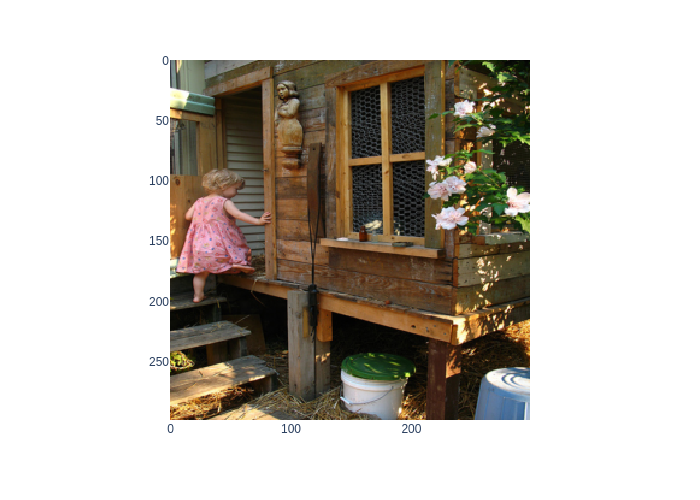

['sacks',
 'sidelines',
 'armbands',
 'night',
 'handstand',
 'fell',
 'purse',
 'treat',
 'blacktop',
 'vintage',
 'casino',
 'lease',
 'kicking',
 'attraction',
 'collie',
 'area',
 'desks',
 'docked',
 'youngsters',
 'dressed']

In [ ]:
img_batch, cap_batch = next(iter(dataloader))
img = img_batch[0].cuda()
cap = cap_batch[0].cuda()
idx = 1
px.imshow(inv_normalize(img.cpu()).permute(1, 2, 0)).show()
[vocab.idx2word[idx] for idx in model.caption_image(img)]